## Training with a Larger Dataset - Cats and Dogs

In the previous lab you trained a classifier with a horses-v-humans dataset. You saw that despite getting great training results, when you tried to do classification with real images, there were many errors, due primarily to overfitting -- where the network  does very well with data that it has previously seen, but poorly with data it hasn't!

In this lab you'll look at a real, and very large dataset, and see the impact this has to avoid overfitting.

- [Dogs and cats dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

In [1]:
import os
import random
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/ECOM09A/Google-Dev/cats-v-dogs.zip', 'r') as zip:
    zip.extractall('/tmp/cats-v-dogs')

os.remove('/content/drive/MyDrive/ECOM09A/Google-Dev/cats-v-dogs.zip')

In [3]:
print(len(os.listdir('/tmp/cats-v-dogs/cats-v-dogs/PetImages/Cat/')))
print(len(os.listdir('/tmp/cats-v-dogs/cats-v-dogs/PetImages/Dog/')))

# Expected Output: 12501, 12501

12501
12501


In [7]:
try:
    os.mkdir('/tmp/cats-v-dogs/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [10]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR =    "/tmp/cats-v-dogs/cats-v-dogs/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/cats-v-dogs/training/cats/"
TESTING_CATS_DIR =  "/tmp/cats-v-dogs/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR =    "/tmp/cats-v-dogs/cats-v-dogs/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR =  "/tmp/cats-v-dogs/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output: 666.jpg is zero length, so ignoring / 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [11]:
print(len(os.listdir('/tmp/cats-v-dogs/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/cats-v-dogs/testing/dogs/')))

# Expected output: 11250, 11250, 1250, 1250

12488
12385
3383
2385


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])


In [15]:

TRAINING_DIR = "/tmp/cats-v-dogs/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

# Expected Output: Found 22498 images belonging to 2 classes. / Found 2500 images belonging to 2 classes.

Found 24871 images belonging to 2 classes.
Found 5767 images belonging to 2 classes.


In [16]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=15, steps_per_epoch=90, validation_data=validation_generator, validation_steps=6)

Epoch 1/15
56/90 [=================>............] - ETA: 3:24 - loss: 0.7494 - acc: 0.5382

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


90/90 [==============================] - 572s 6s/step - loss: 0.7234 - acc: 0.5550 - val_loss: 0.6616 - val_acc: 0.6327
Epoch 2/15
90/90 [==============================] - 565s 6s/step - loss: 0.6344 - acc: 0.6494 - val_loss: 0.5811 - val_acc: 0.6800
Epoch 3/15
90/90 [==============================] - 566s 6s/step - loss: 0.5733 - acc: 0.6981 - val_loss: 0.5225 - val_acc: 0.7473
Epoch 4/15
90/90 [==============================] - 565s 6s/step - loss: 0.5274 - acc: 0.7336 - val_loss: 0.5342 - val_acc: 0.7240
Epoch 5/15
90/90 [==============================] - 564s 6s/step - loss: 0.4922 - acc: 0.7592 - val_loss: 0.4455 - val_acc: 0.8007
Epoch 6/15
90/90 [==============================] - 593s 7s/step - loss: 0.4623 - acc: 0.7775 - val_loss: 0.4417 - val_acc: 0.7980
Epoch 7/15
90/90 [==============================] - 559s 6s/step - loss: 0.4350 - acc: 0.7968 - val_loss: 0.4369 - val_acc: 0.8033
Epoch 8/15
90/90 [==============================] - 603s 7s/step - loss: 0.4154 - acc: 0.8067 

<Figure size 640x480 with 0 Axes>

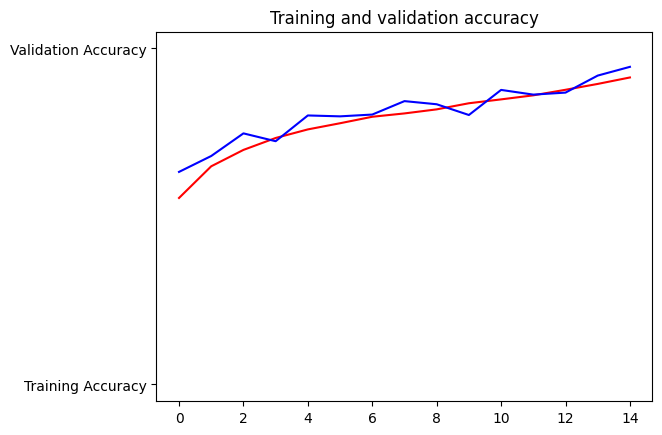

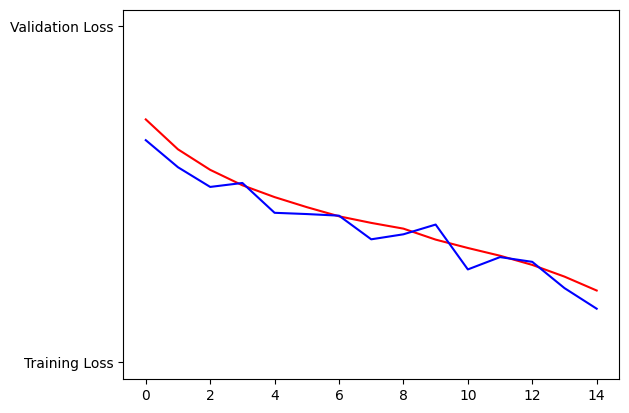

<Figure size 640x480 with 0 Axes>

In [17]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [18]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cachorro-1.jpeg to cachorro-1.jpeg
Saving cachorro-2.jpeg to cachorro-2.jpeg
Saving cachorro-3.jpeg to cachorro-3.jpeg
Saving cat-1.jpeg to cat-1.jpeg
Saving cat-2.jpeg to cat-2.jpeg
Saving puppy-cat-3.jpeg to puppy-cat-3.jpeg
1/1 [==============================] - 0s 392ms/step
[1.]
cachorro-1.jpeg is a dog
1/1 [==============================] - 0s 50ms/step
[1.]
cachorro-2.jpeg is a dog
1/1 [==============================] - 0s 56ms/step
[1.]
cachorro-3.jpeg is a dog
1/1 [==============================] - 0s 53ms/step
[0.]
cat-1.jpeg is a cat
1/1 [==============================] - 0s 50ms/step
[0.]
cat-2.jpeg is a cat
1/1 [==============================] - 0s 50ms/step
[0.]
puppy-cat-3.jpeg is a cat
